# Introduction to Types and Generic Programming

## Exercise 1

In [1]:
using BenchmarkTools

N = 3
A = rand(N, N)
x = rand(N)

@btime $A * $x
@btime A * x
@btime inv($A)

  60.387 ns (1 allocation: 112 bytes)
  73.765 ns (1 allocation: 112 bytes)
  515.544 ns (4 allocations: 1.95 KiB)


3×3 Array{Float64,2}:
 -0.0911469   -2.83491   2.43072
 -8.58851    -11.5601   13.9722
  5.21481      8.83003  -8.89347

In [2]:
using StaticArrays

In [3]:
A2 = SMatrix{N, N}(A)
x2 = SVector{N}(x)
@btime $A2 * $x2
@btime A2 * x2
@btime inv($A2)

  0.001 ns (0 allocations: 0 bytes)
  21.062 ns (1 allocation: 32 bytes)
  7.000 ns (0 allocations: 0 bytes)


3×3 SArray{Tuple{3,3},Float64,2,9} with indices SOneTo(3)×SOneTo(3):
 -0.0911469   -2.83491   2.43072
 -8.58851    -11.5601   13.9722
  5.21481      8.83003  -8.89347

## Exercise 2

In [4]:
using LinearAlgebra

In [5]:
Σ = [0.4  0.3;
     0.3  0.45]
G = I
R = 0.5 * Σ

gain(Σ, G, R) = Σ * G' * inv(G * Σ * G' + R)
@btime gain($Σ, $G, $R)

  624.254 ns (9 allocations: 1.91 KiB)


2×2 Array{Float64,2}:
 0.666667     1.11022e-16
 1.11022e-16  0.666667

In [6]:
Σ2 = SMatrix{2,2}(Σ)
G2 = SMatrix{2,2}(I)
R2 = 0.5 * Σ2
@btime gain($Σ2, $G2, $R2)

  0.001 ns (0 allocations: 0 bytes)


2×2 SArray{Tuple{2,2},Float64,2,4} with indices SOneTo(2)×SOneTo(2):
 0.666667     1.11022e-16
 2.22045e-16  0.666667

## Exercise 3

In [7]:
using Polynomials

p = Polynomial([2, -5, 2], :x)

@show p
p′ = derivative(p)
@show p(0.1), p′(0.1)
@show roots(p);

p = Polynomial(2 - 5*x + 2*x^2)
(p(0.1), p′(0.1)) = (1.52, -4.6)
roots(p) = [0.5, 2.0]


In [8]:
using Plots

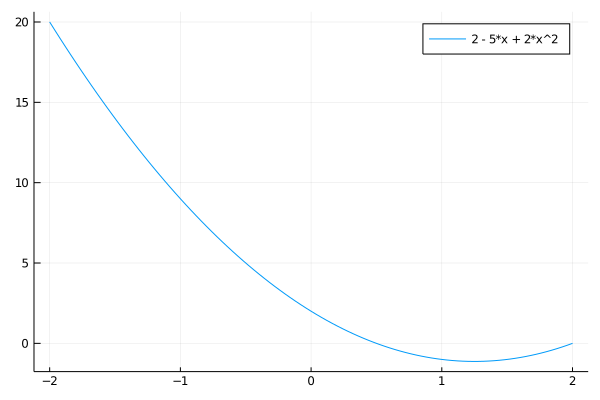

In [9]:
plot(p, -2, 2)

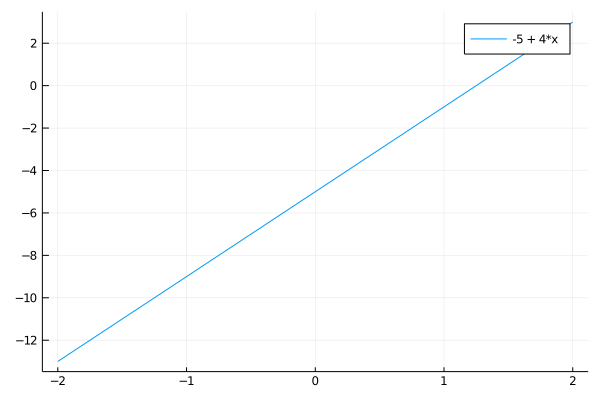

In [10]:
plot(p′, -2, 2)

## Exercise 4

In [11]:
function newton(f::Polynomial, x_0, tol=1e-7, maxiter=100)
    f_prime = derivative(f)
    x_old = x_0
    
    for i in 1:maxiter
        x_new = x_old - f(x_old) / f_prime(x_old)
        if norm(x_old-x_new) < tol
            return 0.5 * (x_old + x_new)
        end
        x_old = x_new
    end
    
    println("Maximum number of iterations reached!")
    return 0.5* (x_old + x_new)
end
    

newton (generic function with 3 methods)

In [12]:
@benchmark roots(p)

BenchmarkTools.Trial: 
  memory estimate:  2.39 KiB
  allocs estimate:  22
  --------------
  minimum time:     1.150 μs (0.00% GC)
  median time:      1.230 μs (0.00% GC)
  mean time:        1.447 μs (11.67% GC)
  maximum time:     369.960 μs (98.80% GC)
  --------------
  samples:          10000
  evals/sample:     10

In [13]:
@benchmark newton(p, 10)

BenchmarkTools.Trial: 
  memory estimate:  1.39 KiB
  allocs estimate:  51
  --------------
  minimum time:     675.000 ns (0.00% GC)
  median time:      689.196 ns (0.00% GC)
  mean time:        825.693 ns (13.98% GC)
  maximum time:     39.649 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     148

## Exercise 5

In [14]:
function trapesoidal(f::AbstractArray, x::AbstractArray)
    @assert length(x) == length(f)
    res = 0
    for i in eachindex(x[1:end-1])
        res += 0.5 * (f[i+1] + f[i]) * (x[i+1] - x[i])
    end
    return res
end

trapesoidal (generic function with 1 method)

In [15]:
function trapesoidal(f::AbstractArray, x::AbstractRange)
    @assert length(x) == length(f)
    h = step(x)
    res = 0
    for i in eachindex(x[1:end-1])
        res += 0.5 * (f[i+1] + f[i])
    end
    res *= h
    return res
end

trapesoidal (generic function with 2 methods)

In [16]:
function trapesoidal(f::Function, x̲::Real, x̄::Real, N::Real)
    gridx = range(x̲, x̄, length=N)
    gridf = f.(gridx)
    return trapesoidal(gridf, gridx)
end

trapesoidal (generic function with 3 methods)

In [17]:
f(x) = x^2
x̄ = 1
x̲ = 0
N = 100
x_range = range(x̲, x̄, length=N)
x_array = Array(x_range)
f_array = f.(x_array)
@show trapesoidal(f_array, x_array)
@show trapesoidal(f_array, x_range)
@show trapesoidal(f, x̲, x̄, N);

trapesoidal(f_array, x_array) = 0.33335033840084344
trapesoidal(f_array, x_range) = 0.3333503384008435
trapesoidal(f, x̲, x̄, N) = 0.3333503384008435


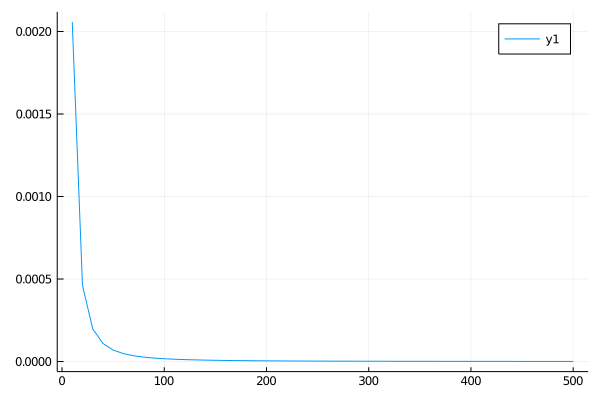

In [18]:
nset = 10:10:500
err = zeros(size(nset))
I_bmk = 1.0/3
for i in eachindex(nset)
    err[i] = trapesoidal(f, x̲, x̄, nset[i]) - I_bmk
end
plot(nset, err)

In [19]:
using QuadGK

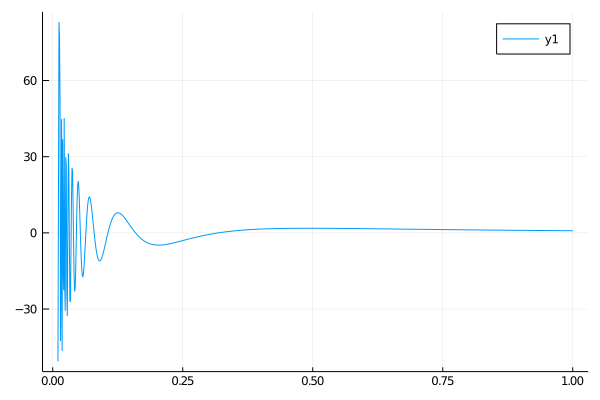

In [20]:
f3(x) = 1/x*sin(1/x)
x̄ = 1.0
x̲ = 0.01
plot(f3, x̲:0.001:x̄)

(I_bmk,) = quadgk(f3, x̲, x̄) = (0.6161423965218734, 6.836393219209445e-9)


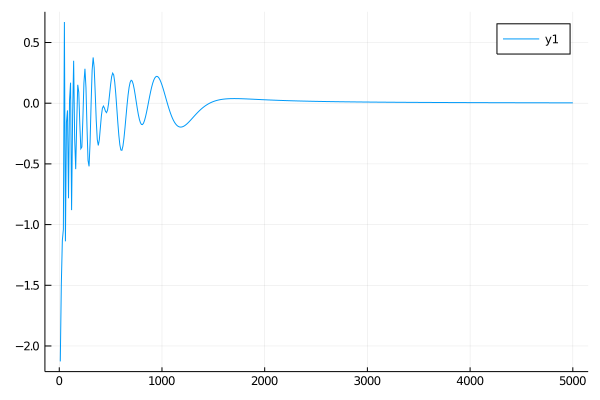

In [21]:
nset = 10:10:5000
err = zeros(size(nset))
@show I_bmk, = quadgk(f3, x̲, x̄)
for i in eachindex(nset)
    err[i] = trapesoidal(f3, x̲, x̄, nset[i]) - I_bmk
end
plot(nset, err)

## Exercise 6

In [22]:
using ForwardDiff
x̲ = 0.0

function trapesoidal(f::Function, x̲::Real, x̄::Real, N::Real)
    gridx = range(x̲, x̄, length=N)
    gridf = f.(gridx)
    return trapesoidal(gridf, gridx)
end

function ∫f(x̲, x; N = 100)
    return trapesoidal(f, x̲, x, N)
end

Df(x) = ForwardDiff.derivative(y -> ∫f(0.0, y), x)

@show ∫f(0.0, 1.0)
@show ∫f(0.0, 1.1)

Df(1.0)

∫f(0.0, 1.0) = 0.3333503384008435
∫f(0.0, 1.1) = 0.4436893004115226


1.0000510152025304